 # **Linear Regression and Decision Tree Regressor on Sales Data - Linh Nguyen**


### Data Dictionary
- Sale: This variable contains numerical data representing the number of product sales for each observed week.

- Price: The observed week's base price for the product.

- Radio: The number of radio advertisements or campaigns promoting the product for the observed week.

- InStrSpending: The average expenses associated with promoting the product in stores for the observed week.

- Discount: The discount rate applicable for the observed week.

- TVSpending: The average expenditure on television campaigns during the observed week.

- StockRate: The stock-out rate, calculated as the number of times the product was out of stock divided by the total number of product visits.

- OnlineAdsSpending: The online ads spending, calculated the total amount of spend on online advertising.

In [1]:
%matplotlib inline
from pathlib import Path

import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge

from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error, r2_score
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns

import numpy as np

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import StandardScaler

pd.set_option("display.max_columns", 20)
pd.set_option("display.max_rows", 20)


In [2]:
sales_df = pd.read_csv('/Users/nguyenhalinh/Desktop/ANOP330-FA23/Data/market_data.csv')

sales_df.head()

,Sale,InStrSpending,Discount,TVSpending,StockRate,Price,Radio,OnlineAdsSpending
0,240368,59.90,0.46,46.30,0.45,12.56,1065,1081.60
1,207276,7.28,0.39,166.91,0.05,5.44,1832,651.24
2,172572,9.81,0.41,73.67,0.06,3.54,587,1066.56
3,82697,46.94,0.27,33.95,0.88,28.90,1407,1855.27
4,141762,2.59,0.26,82.63,0.36,4.66,2057,1608.91


## **EDA**

In [3]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sale               992 non-null    int64  
 1   InStrSpending      992 non-null    float64
 2   Discount           992 non-null    float64
 3   TVSpending         992 non-null    float64
 4   StockRate          992 non-null    float64
 5   Price              992 non-null    float64
 6   Radio              992 non-null    int64  
 7   OnlineAdsSpending  992 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 62.1 KB


In [18]:
sales_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sale,992.0,171327.118952,81397.843301,1992.00,112479.2500,170390.500,226027.2500,393914.00
InStrSpending,992.0,30.593034,17.493103,0.19,14.8300,31.385,45.6600,59.96
Discount,992.0,0.251139,0.145348,0.00,0.1300,0.250,0.3800,0.50
TVSpending,992.0,98.678740,57.117347,0.13,49.6375,97.510,147.6200,199.91
StockRate,992.0,0.494526,0.286810,0.00,0.2500,0.490,0.7400,1.00
Price,992.0,14.599829,8.715533,0.14,6.9175,14.820,22.1000,29.99
Radio,992.0,1479.569556,885.419636,4.00,708.2500,1413.500,2273.0000,2997.00
OnlineAdsSpending,992.0,1596.504284,927.474787,12.54,786.3275,1595.455,2420.6875,3198.27


In [19]:
predictors = ['InStrSpending', 'Discount', 'TVSpending', 'StockRate', 'Price','Radio', 'OnlineAdsSpending']
outcome = 'Sale'

In [20]:
X = sales_df[predictors]
y = sales_df[outcome]

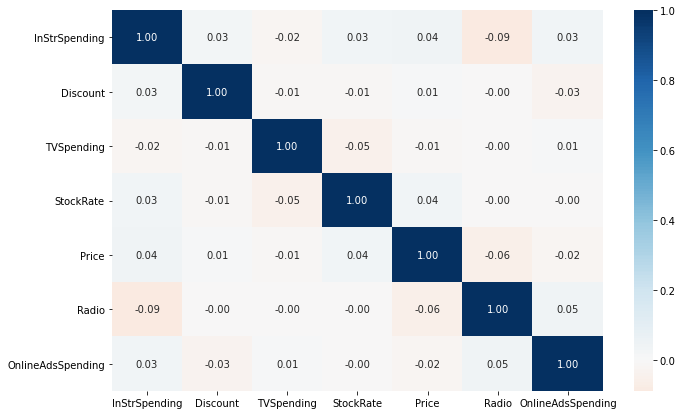

In [21]:
#correlation among predictors
corr = X.corr()
# Include information about values
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="RdBu", center=0, ax=ax);
plt.savefig('correlation_predictors.png')

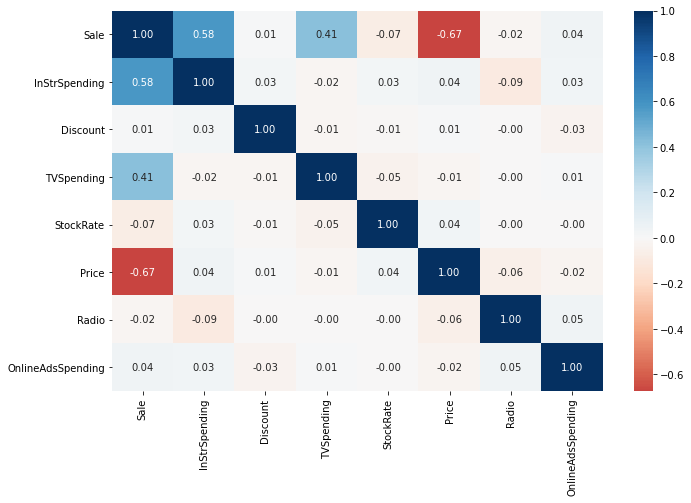

In [22]:
#Correlation between predictors and target
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(sales_df.corr(),annot = True, fmt=".2f", cmap="RdBu", center=0, ax=ax)
plt.savefig('correlation.png')

In [158]:
# #Pairwise Scatterplots
# sns.pairplot(sales_df[['Price','InStrSpending','TVSpending','Sale']])

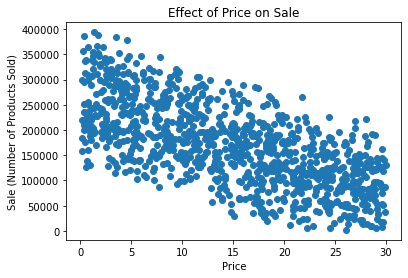

In [24]:
#Scatter plot between Sale and Price
plt.scatter(x=sales_df['Price'], y=sales_df['Sale'])
plt.title("Effect of Price on Sale")
plt.ylabel("Sale (Number of Products Sold)")
plt.xlabel("Price")
plt.savefig('sale_price.png')
plt.show()


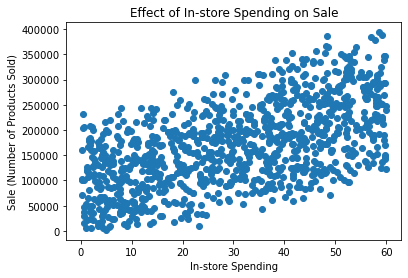

In [25]:
#Scatter plot between Sale and InStrSpending
plt.scatter(x=sales_df['InStrSpending'], y=sales_df['Sale'])
plt.title("Effect of In-store Spending on Sale")
plt.ylabel("Sale (Number of Products Sold)")
plt.xlabel("In-store Spending")

plt.savefig('sale_instr.png')
plt.show()


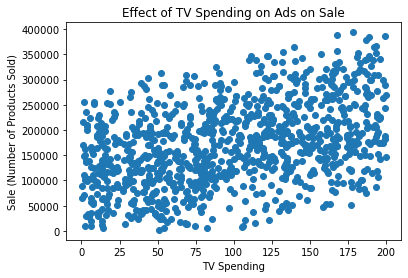

In [26]:
#Scatter plot between Sale and TVSpending
plt.scatter(x=sales_df['TVSpending'], y=sales_df['Sale'])
plt.title("Effect of TV Spending on Ads on Sale")
plt.ylabel("Sale (Number of Products Sold)")
plt.xlabel("TV Spending")
plt.savefig('sale_tv.png')
plt.show()

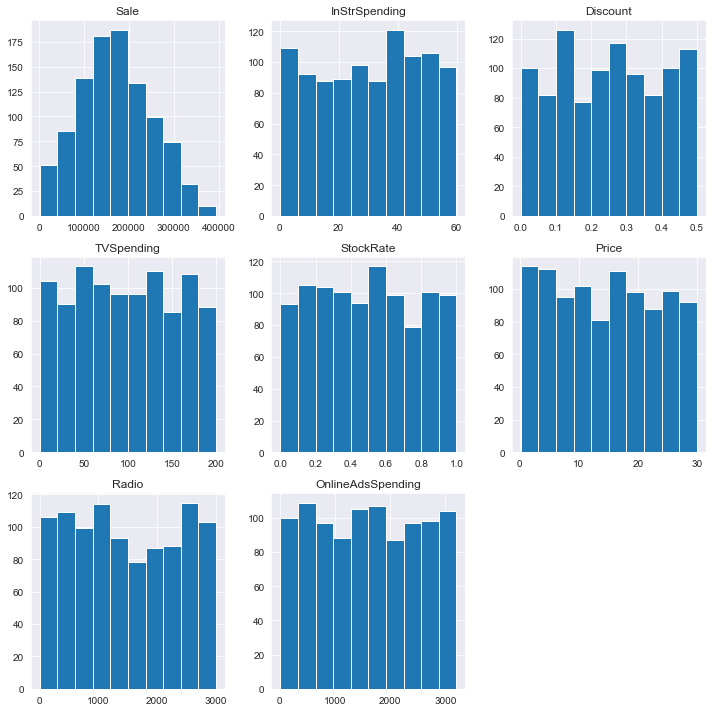

In [11]:
#Histogram distribution for each variable
sns.set_style('darkgrid')
sales_df.hist(figsize=(10,10));
plt.tight_layout()
plt.savefig('univariate_analysis.png')

## **Data Partition**

In [54]:
predictors = ['InStrSpending', 'Discount', 'TVSpending', 'StockRate', 'Price','Radio', 'OnlineAdsSpending']
outcome = 'Sale'

In [55]:
X = sales_df[predictors]
y = sales_df[outcome]

In [56]:
X.head()

,InStrSpending,Discount,TVSpending,StockRate,Price,Radio,OnlineAdsSpending
0,59.90,0.46,46.30,0.45,12.56,1065,1081.60
1,7.28,0.39,166.91,0.05,5.44,1832,651.24
2,9.81,0.41,73.67,0.06,3.54,587,1066.56
3,46.94,0.27,33.95,0.88,28.90,1407,1855.27
4,2.59,0.26,82.63,0.36,4.66,2057,1608.91


In [57]:
y.head()

0    240368
1    207276
2    172572
3     82697
4    141762
Name: Sale, dtype: int64

In [58]:
# Partition 60% into Trainging data and 40% into validation data
train_X, valid_X, train_y, valid_y = train_test_split(X, y, train_size=0.6, random_state=1)

In [59]:
train_X.shape

(595, 7)

## **Linear Regression**

#### Model Training

In [60]:
sales_lm = LinearRegression()
sales_lm.fit(train_X, train_y)

# print coefficients
print('intercept ', sales_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': sales_lm.coef_}))

intercept  124990.3463322561
           Predictor   coefficient
0      InStrSpending   2882.179046
1           Discount   4425.186560
2         TVSpending    590.297975
3          StockRate -13609.314277
4              Price  -6487.981676
5              Radio      0.003681
6  OnlineAdsSpending      0.123053


In [61]:
# Computer the R^2 value using the "score" method of linearRegression()
sales_lm.score(train_X,train_y)

0.9985402013114074

R squared for training data is 99%, meaning that 99% of the variation of sales is explained by all predictors in the regression model. This suggests that the model is trained really well on training data, which might lead to overfitting problem

In [62]:
# Make a prediction for the training data!!! train_X
# with the model we already "fit" (build)

train_pred_y_lm = sales_lm.predict(train_X)
train_result_lm = pd.DataFrame({'Predicted': train_pred_y_lm, 'Actual': train_y,
                       'Error': train_y - train_pred_y_lm})
print(train_result_lm.head(10))

         Predicted  Actual        Error
371  243226.164260  240951 -2275.164260
45   228612.624720  224778 -3834.624720
762  111251.432104  112255  1003.567896
578   41877.061666   45746  3868.938334
446   57252.672572   57216   -36.672572
599  206248.059432  203306 -2942.059432
719  193537.674834  191482 -2055.674834
11   192927.987048  192936     8.012952
214   60437.005513   61410   972.994487
344   10464.269603   19264  8799.730397


#### Model Validation

In [63]:
valid_pred_y_lm = sales_lm.predict(valid_X)
valid_result_lm = pd.DataFrame({'Predicted': valid_pred_y_lm, 'Actual': valid_y,
                       'Error': valid_y - valid_pred_y_lm})
print(valid_result_lm.head(10))

         Predicted  Actual         Error
658  227135.634241  224539  -2596.634241
727  147305.889574  146017  -1288.889574
335  137616.805332  139837   2220.194668
678  220732.919581  219372  -1360.919581
94    -2006.919089    9036  11042.919089
301  138276.425321  138225    -51.425321
680  123045.558315  121483  -1562.558315
236  156521.791635  165427   8905.208365
108  258170.208305  260823   2652.791695
805  181845.372999  179657  -2188.372999


#### Compare Performance between Training and Validation

In [64]:
# For Training Data
ME = (train_y - train_pred_y_lm).mean()
MAD = mean_absolute_error(train_y,train_pred_y_lm)
MAPE = mean_absolute_percentage_error(train_y,train_pred_y_lm)
MSE = mean_squared_error(train_y,train_pred_y_lm)
RMSE = np.sqrt(MSE)
R_2 = r2_score(train_y,train_pred_y_lm)

print("Performance Metrics for Training Data")
# print("Mean Error (ME)= {0:.2f}".format(ME))
# print("Mean Absolute Deviation (MAD or MAE)= {0:.2f}".format(MAD))

print("Mean Absolute Percentage Error (MAPE)= {0:.2f}".format(100*MAPE))
# print("Mean Squared Error (MSE)= {0:.2f}".format(MSE))
print("Root Mean Squared Error (RSME)= {0:.2f}".format(RMSE))
print("R Squared Error (R^2)= {0:.3f}".format(R_2))


Performance Metrics for Training Data
Mean Absolute Percentage Error (MAPE)= 3.75
Root Mean Squared Error (RSME)= 3125.44
R Squared Error (R^2)= 0.999


In [66]:
# With Validation Data
ME = (valid_y - valid_pred_y_lm).mean()
MAD = mean_absolute_error(valid_y,valid_pred_y_lm)
MAPE = mean_absolute_percentage_error(valid_y,valid_pred_y_lm)
MSE = mean_squared_error(valid_y,valid_pred_y_lm)
RMSE = np.sqrt(MSE)
R_2 = r2_score(valid_y,valid_pred_y_lm)

print("Performance Metrics for VALIDATION Data")
# print("Mean Error (ME)= {0:.2f}".format(ME))
# print("Mean Absolute Deviation (MAD or MAE)= {0:.2f}".format(MAD))
print("Mean Absolute Percentage Error (MAPE)= {0:.2f}".format(100*MAPE))
# print("Mean Squared Error (MSE)= {0:.2f}".format(MSE))
print("Root Mean Squared Error (RSME)= {0:.2f}".format(RMSE))
print("R Squared Error (R^2)= {0:.3f}".format(R_2))


Performance Metrics for VALIDATION Data
Mean Absolute Percentage Error (MAPE)= 4.98
Root Mean Squared Error (RSME)= 3155.27
R Squared Error (R^2)= 0.998


In [67]:
# print coefficients
print('intercept ', sales_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': sales_lm.coef_}))

intercept  124990.3463322561
           Predictor   coefficient
0      InStrSpending   2882.179046
1           Discount   4425.186560
2         TVSpending    590.297975
3          StockRate -13609.314277
4              Price  -6487.981676
5              Radio      0.003681
6  OnlineAdsSpending      0.123053


#### Residuals Checking

In [26]:
# all_residuals = valid_y - valid_pred_y_lm

# # Create a histogram
# fig, ax = plt.subplots(figsize=(8,5))
# ax.set_ylabel("Number of Sales")
# ax.set_xlabel("Residuals (Errors in Sales Prediction)")
# ax.set_title("Distribution of Prediction Errors for Validation Data Sales Prediction")
# ax.hist(all_residuals, bins=30, edgecolor='black', color="C0")
# # Tweak spacing to prevent clipping of ylabel

# fig.tight_layout()
# plt.show()

/Users/nguyenhalinh/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sale', ylabel='Density'>

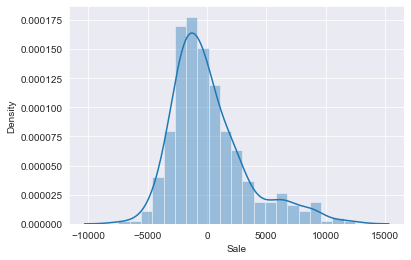

In [27]:
# checking difference between labled y and predicted y
sns.distplot(valid_y - valid_pred_y_lm)

### **Lasso Regularization**

In [73]:
# Standardize data before doing lasso regularization
scaler = StandardScaler()
scaler.fit(train_X)

train_X_std = pd.DataFrame(scaler.transform(train_X),columns=train_X.columns,index=train_X.index)
valid_X_std = pd.DataFrame(scaler.transform(valid_X),columns=valid_X.columns,index=valid_X.index)

In [74]:
lasso_cv = LassoCV(normalize=False,cv=5)
lasso_cv.fit(train_X_std, train_y)
print('Lasso-CV chosen regularization:  {:.2f}'.format(lasso_cv.alpha_))
# print coefficients
print('Intercept: {:.2f}'.format(lasso_cv.intercept_))

# Set the display options to print the dataframe
pd.options.display.float_format = '{:,.3f}'.format
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': lasso_cv.coef_}),'\n')
# Print fit metric R^2
print('R-squared of the fit with training data: {:.3f}'.format(lasso_cv.score(train_X_std,train_y)),'\n')

Lasso-CV chosen regularization:  55.47
Intercept: 171846.46
           Predictor  coefficient
0      InStrSpending   50,068.674
1           Discount      590.745
2         TVSpending   33,422.491
3          StockRate   -3,921.518
4              Price  -57,054.024
5              Radio        0.000
6  OnlineAdsSpending       56.828 

R-squared of the fit with training data: 0.999 



In [75]:
print("The prediction performance metrics for the TRAINING data:")
las_train_pred_y = lasso_cv.predict(train_X_std)

ME = (train_y - las_train_pred_y).mean()
MAD = mean_absolute_error(train_y,las_train_pred_y)
MAPE = mean_absolute_percentage_error(train_y,las_train_pred_y)
MSE = mean_squared_error(train_y,las_train_pred_y)
RMSE = np.sqrt(MSE)
R_2 = r2_score(train_y,las_train_pred_y)

print("Performance Metrics for VALIDATION Data")
# print("Mean Error (ME)= {0:.2f}".format(ME))
# print("Mean Absolute Deviation (MAD or MAE)= {0:.2f}".format(MAD))
print("Mean Absolute Percentage Error (MAPE)= {0:.2f}".format(100*MAPE))
# print("Mean Squared Error (MSE)= {0:.2f}".format(MSE))
print("Root Mean Squared Error (RSME)= {0:.2f}".format(RMSE))
print("R Squared Error (R^2)= {0:.3f}".format(R_2))


The prediction performance metrics for the TRAINING data:
Performance Metrics for VALIDATION Data
Mean Absolute Percentage Error (MAPE)= 3.70
Root Mean Squared Error (RSME)= 3128.42
R Squared Error (R^2)= 0.999


In [76]:
print("The prediction performance metrics for the VALIDATION data:")
las_valid_pred_y = lasso_cv.predict(valid_X_std)

ME = (valid_y - las_valid_pred_y).mean()
MAD = mean_absolute_error(valid_y,las_valid_pred_y)
MAPE = mean_absolute_percentage_error(valid_y,las_valid_pred_y)
MSE = mean_squared_error(valid_y,las_valid_pred_y)
RMSE = np.sqrt(MSE)
R_2 = r2_score(valid_y,las_valid_pred_y)


print("Performance Metrics for VALIDATION Data")
# print("Mean Error (ME)= {0:.2f}".format(ME))
# print("Mean Absolute Deviation (MAD or MAE)= {0:.2f}".format(MAD))
print("Mean Absolute Percentage Error (MAPE)= {0:.2f}".format(100*MAPE))
# print("Mean Squared Error (MSE)= {0:.2f}".format(MSE))
print("Root Mean Squared Error (RSME)= {0:.2f}".format(RMSE))
print("R Squared Error (R^2)= {0:.3f}".format(R_2))


The prediction performance metrics for the VALIDATION data:
Performance Metrics for VALIDATION Data
Mean Absolute Percentage Error (MAPE)= 4.87
Root Mean Squared Error (RSME)= 3139.80
R Squared Error (R^2)= 0.998


/Users/nguyenhalinh/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sale', ylabel='Density'>

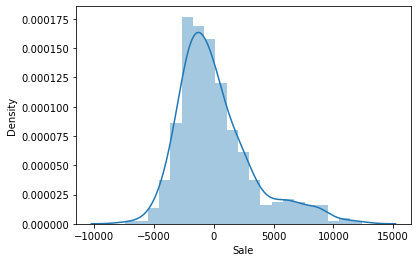

In [77]:
# checking difference between labled y and predicted y
sns.distplot(valid_y - las_valid_pred_y)

## **Decision Tree Regressor**

#### Model Training

In [78]:
sales_regr = DecisionTreeRegressor(max_depth=3, random_state=2)
sales_regr.fit(train_X,train_y)

DecisionTreeRegressor(max_depth=3, random_state=2)

In [79]:
sales_regr.score(train_X,train_y)

0.7789330692624599

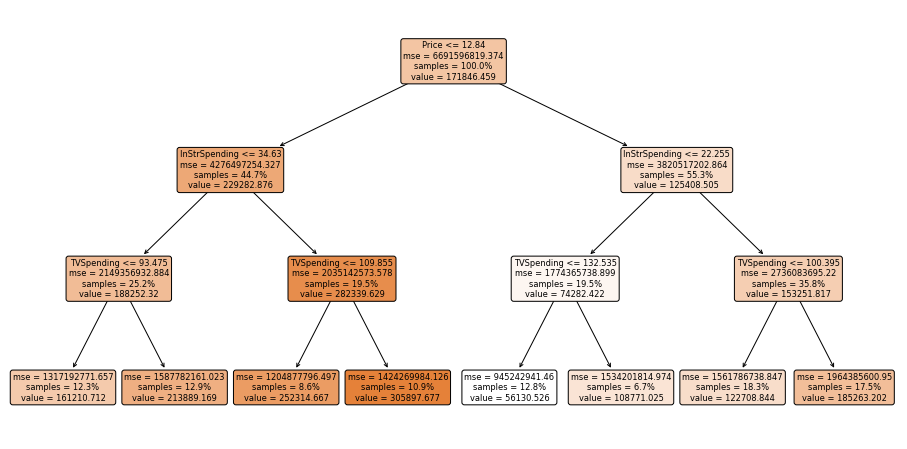

In [80]:
fig, ax = plt.subplots(figsize=(16, 8))
plot_tree(sales_regr, filled=True,feature_names=X.columns, proportion=True, rounded=True)
plt.show()

In [81]:
# Make a prediction for the training data!!! train_X
# with the model we already "fit" (build)

train_pred_y_regr = sales_regr.predict(train_X)
train_result_regr = pd.DataFrame({'Predicted': train_pred_y_regr, 'Actual': train_y,
                       'Error': train_y - train_pred_y_regr})
print(train_result_regr.head(10))

      Predicted  Actual       Error
371 252,314.667  240951 -11,363.667
45  252,314.667  224778 -27,536.667
762 122,708.844  112255 -10,453.844
578  56,130.526   45746 -10,384.526
446  56,130.526   57216   1,085.474
599 185,263.202  203306  18,042.798
719 185,263.202  191482   6,218.798
11  161,210.712  192936  31,725.288
214 108,771.025   61410 -47,361.025
344  56,130.526   19264 -36,866.526


#### Model Validation

In [82]:
valid_pred_y_regr = sales_regr.predict(valid_X)
valid_result_regr = pd.DataFrame({'Predicted': valid_pred_y_regr, 'Actual': valid_y,
                       'Error': valid_y - valid_pred_y_regr})
print(valid_result_regr.head(10))

      Predicted  Actual       Error
658 252,314.667  224539 -27,775.667
727 161,210.712  146017 -15,193.712
335 185,263.202  139837 -45,426.202
678 213,889.169  219372   5,482.831
94   56,130.526    9036 -47,094.526
301 161,210.712  138225 -22,985.712
680 185,263.202  121483 -63,780.202
236 213,889.169  165427 -48,462.169
108 252,314.667  260823   8,508.333
805 161,210.712  179657  18,446.288


#### Compare Performance between Training and Validation

In [83]:
# For Training Data
ME = (train_y - train_pred_y_regr).mean()
MAD = mean_absolute_error(train_y,train_pred_y_regr)
MAPE = mean_absolute_percentage_error(train_y,train_pred_y_regr)
MSE = mean_squared_error(train_y,train_pred_y_regr)
RMSE = np.sqrt(MSE)
R_2 = r2_score(train_y,train_pred_y_regr)

print("Performance Metrics for Training Data")
# print("Mean Error (ME)= {0:.2f}".format(ME))
# print("Mean Absolute Deviation (MAD or MAE)= {0:.2f}".format(MAD))

print("Mean Absolute Percentage Error (MAPE)= {0:.2f}".format(100*MAPE))
# print("Mean Squared Error (MSE)= {0:.2f}".format(MSE))
print("Root Mean Squared Error (RSME)= {0:.2f}".format(RMSE))
print("R Squared Error (R^2)= {0:.2f}".format(R_2))

Performance Metrics for Training Data
Mean Absolute Percentage Error (MAPE)= 31.74
Root Mean Squared Error (RSME)= 38461.55
R Squared Error (R^2)= 0.78


In [84]:
# With Validation Data
ME = (valid_y - valid_pred_y_regr).mean()
MAD = mean_absolute_error(valid_y,valid_pred_y_regr)
MAPE = mean_absolute_percentage_error(valid_y,valid_pred_y_regr)
MSE = mean_squared_error(valid_y,valid_pred_y_regr)
RMSE = np.sqrt(MSE)
R_2 = r2_score(valid_y,valid_pred_y_regr)


print("Performance Metrics for VALIDATION Data")
# print("Mean Error (ME)= {0:.2f}".format(ME))
# print("Mean Absolute Deviation (MAD or MAE)= {0:.2f}".format(MAD))
print("Mean Absolute Percentage Error (MAPE)= {0:.2f}".format(100*MAPE))
# print("Mean Squared Error (MSE)= {0:.2f}".format(MSE))
print("Root Mean Squared Error (RSME)= {0:.2f}".format(RMSE))
print("R Squared Error (R^2)= {0:.2f}".format(R_2))

Performance Metrics for VALIDATION Data
Mean Absolute Percentage Error (MAPE)= 39.64
Root Mean Squared Error (RSME)= 40962.18
R Squared Error (R^2)= 0.74


### **Feature Importance**

In [85]:
#Print only important features
sales_regr.feature_importances_
print(pd.DataFrame({'Predictors': train_X.columns, 'Reduction of MSE': sales_regr.feature_importances_}))

          Predictors  Reduction of MSE
0      InStrSpending             0.338
1           Discount             0.000
2         TVSpending             0.151
3          StockRate             0.000
4              Price             0.512
5              Radio             0.000
6  OnlineAdsSpending             0.000


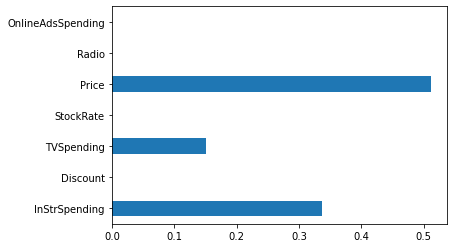

In [86]:
feat_importances = pd.Series(sales_regr.feature_importances_, index=train_X.columns)
feat_importances.plot(kind='barh')
plt.show()

In [87]:
fi_sales_regr = DecisionTreeRegressor(max_depth = 3, random_state=2)
fi_sales_regr.fit(train_X[['Price', 'TVSpending', 'InStrSpending']], train_y)

DecisionTreeRegressor(max_depth=3, random_state=2)

In [88]:
fi_sales_regr.score(train_X[['Price', 'TVSpending', 'InStrSpending']], train_y)

0.7789330692624599

### **Hyperparemter Tuning**

In [151]:
# Hyper parameters range intialization for tuning 

parameters={'max_depth':np.arange(1,10).tolist(),
            'min_samples_split':np.arange(2,11).tolist()[::2],
            'max_features':np.arange(1,8).tolist(),
            'min_impurity_decrease': [0,0.01,0.001,0.0001]} 

In [ ]:
tuning_model=GridSearchCV(DecisionTreeRegressor(random_state=2),
                          param_grid=parameters,
#                           scoring='neg_mean_squared_error',
                          cv=5, verbose = 3)
tuning_model.fit(train_X, train_y)

In [153]:
#Best parameters
tuning_model.best_params_

{'max_depth': 8,
 'max_features': 6,
 'min_impurity_decrease': 0,
 'min_samples_split': 4}

In [149]:
#Best score obtained from grid search 
tuning_model.best_score_

0.9094318405701729

In [154]:
#Retrain the model with the best hyperparameters
tuned_sales_regr = DecisionTreeRegressor(**tuning_model.best_params_, random_state=2)
tuned_sales_regr.fit(train_X, train_y)

DecisionTreeRegressor(max_depth=8, max_features=6, min_impurity_decrease=0,
                      min_samples_split=4, random_state=2)

In [155]:
# For Training Data
train_pred_y_regr_tuned = tuned_sales_regr.predict(train_X)

ME = (train_y - train_pred_y_regr_tuned).mean()
MAD = mean_absolute_error(train_y,train_pred_y_regr_tuned)
MAPE = mean_absolute_percentage_error(train_y,train_pred_y_regr_tuned)
MSE = mean_squared_error(train_y,train_pred_y_regr_tuned)
RMSE = np.sqrt(MSE)
R_2 = r2_score(train_y,train_pred_y_regr_tuned)

print("Performance Metrics for Training Data")
# print("Mean Error (ME)= {0:.2f}".format(ME))
# print("Mean Absolute Deviation (MAD or MAE)= {0:.2f}".format(MAD))

print("Mean Absolute Percentage Error (MAPE)= {0:.2f}".format(100*MAPE))
# print("Mean Squared Error (MSE)= {0:.2f}".format(MSE))
print("Root Mean Squared Error (RSME)= {0:.2f}".format(RMSE))
print("R Squared Error (R^2)= {0:.2f}".format(R_2))

Performance Metrics for Training Data
Mean Absolute Percentage Error (MAPE)= 4.42
Root Mean Squared Error (RSME)= 6890.75
R Squared Error (R^2)= 0.99


In [156]:
# With Validation Data
valid_pred_y_regr_tuned = tuned_sales_regr.predict(valid_X)

ME = (valid_y - valid_pred_y_regr_tuned).mean()
MAD = mean_absolute_error(valid_y,valid_pred_y_regr_tuned)
MAPE = mean_absolute_percentage_error(valid_y,valid_pred_y_regr_tuned)
MSE = mean_squared_error(valid_y,valid_pred_y_regr_tuned)
RMSE = np.sqrt(MSE)
R_2 = r2_score(valid_y,valid_pred_y_regr_tuned)

print("Performance Metrics for VALIDATION Data")
# print("Mean Error (ME)= {0:.2f}".format(ME))
# print("Mean Absolute Deviation (MAD or MAE)= {0:.2f}".format(MAD))
print("Mean Absolute Percentage Error (MAPE)= {0:.2f}".format(100*MAPE))
# print("Mean Squared Error (MSE)= {0:.2f}".format(MSE))
print("Root Mean Squared Error (RSME)= {0:.2f}".format(RMSE))
print("R Squared Error (R^2)= {0:.2f}".format(R_2))

Performance Metrics for VALIDATION Data
Mean Absolute Percentage Error (MAPE)= 17.73
Root Mean Squared Error (RSME)= 23282.09
R Squared Error (R^2)= 0.92


In [157]:
# fig, ax = plt.subplots(figsize=(16, 8))
# plot_tree(tuned_sales_regr, filled=True,feature_names=X.columns, proportion=True, rounded=True)
# plt.show()